In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

In [2]:
ticker = 'HUBS'
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source='yahoo', start='2010-1-1')['Adj Close']

In [3]:
log_returns = np.log(1+data.pct_change())
log_returns.head()

,HUBS
Date,
2014-10-09,NaN
2014-10-10,-0.035507
2014-10-13,-0.063965
2014-10-14,0.090796
2014-10-15,-0.081664


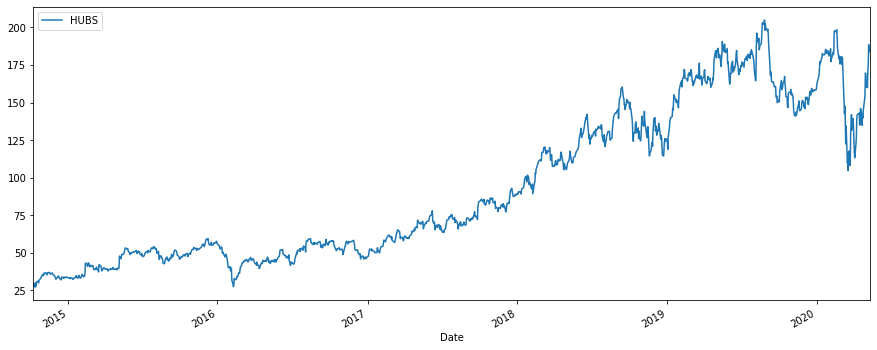

In [4]:
data.plot(figsize=(15,6))

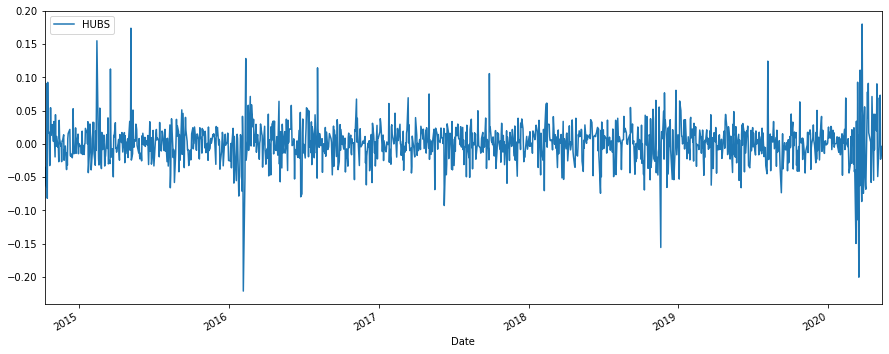

In [5]:
log_returns.plot(figsize=(15,6))

In [6]:
u = log_returns.mean()
var = log_returns.var()

$$
{drift} = {u} - \frac{1}{2} * {var}
$$

In [7]:
drift = u - (0.5*var)

In [8]:
stddev = log_returns.std()

In [9]:
drift.values
stddev.values

array([0.02944311])

In [10]:
norm.ppf(0.95)

1.6448536269514722

In [11]:
x = np.random.rand(10,2)
x

array([[0.19235645, 0.01749314],
       [0.08406288, 0.97829873],
       [0.2715542 , 0.46264753],
       [0.54747893, 0.9294803 ],
       [0.89454531, 0.30324592],
       [0.91463641, 0.3929477 ],
       [0.81749873, 0.57247535],
       [0.89988533, 0.35458013],
       [0.52082098, 0.76439159],
       [0.08031506, 0.95025191]])

In [12]:
norm.ppf(x)

array([[-0.86924545, -2.10851727],
       [-1.37825114,  2.01981539],
       [-0.60811924, -0.09376596],
       [ 0.11929437,  1.47193144],
       [ 1.25106878, -0.51508755],
       [ 1.36987101, -0.27164447],
       [ 0.90587403,  0.18267977],
       [ 1.28089847, -0.37298414],
       [ 0.05221418,  0.72050062],
       [-1.40295546,  1.6473011 ]])

In [13]:
Z = norm.ppf(np.random.rand(10,2))
Z

array([[-0.05563432,  1.35240318],
       [-0.22522879, -0.69674716],
       [ 1.25103708,  0.22965039],
       [-1.01527135,  0.01839672],
       [-0.36730233, -0.77068226],
       [ 1.7558712 , -0.40281878],
       [-0.91084766, -0.17270947],
       [-1.61837816, -0.95395201],
       [-1.81473205,  0.37411298],
       [-1.36013869,  0.38633873]])

In [14]:
t_intervals = 1000
iterations = 10

$$
{daily}_{returns} = {e^r}
$$

$$
{r}={drift}+{stdev*z}
$$

In [15]:
daily_returns = np.exp(drift.values + stddev.values * norm.ppf(np.random.rand(t_intervals, iterations)))

In [16]:
daily_returns

array([[1.0506064 , 1.01512376, 0.99192286, ..., 0.95969986, 1.0406811 ,
        1.04368793],
       [1.02778225, 0.97356172, 1.05071597, ..., 0.97301497, 1.0160462 ,
        1.01789584],
       [1.03403516, 1.01194279, 1.02258938, ..., 1.03191671, 0.96972444,
        1.02496932],
       ...,
       [0.98770469, 1.00924535, 0.98027497, ..., 0.98062273, 0.97788282,
        0.98910973],
       [0.95111702, 1.00276632, 0.95145888, ..., 0.99402885, 1.05892081,
        1.03161646],
       [0.99661494, 1.00901543, 0.98620811, ..., 1.00320581, 0.9647283 ,
        1.02674159]])

---

In [17]:
S0 = data.iloc[-1]
S0

HUBS    183.539993
Name: 2020-05-11 00:00:00, dtype: float64

In [18]:
price_list = np.zeros_like(daily_returns)

In [19]:
price_list.shape

(1000, 10)

In [20]:
price_list[0] = S0
price_list

array([[183.53999329, 183.53999329, 183.53999329, ..., 183.53999329,
        183.53999329, 183.53999329],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

In [21]:
for t in range(1,t_intervals):
    price_list[t] = price_list[t-1]*daily_returns[t]

In [22]:
price_list

array([[ 183.53999329,  183.53999329,  183.53999329, ...,  183.53999329,
         183.53999329,  183.53999329],
       [ 188.63914649,  178.68751221,  192.84840281, ...,  178.58716136,
         186.48511233,  186.82459505],
       [ 195.05950955,  180.82154048,  197.20472911, ...,  184.28707524,
         180.83917059,  191.48947817],
       ...,
       [ 431.96048006,   89.65081437,  281.60985058, ...,  535.12678874,
        1379.80288168,  155.68014391],
       [ 410.84496558,   89.89881694,  267.94019363, ...,  531.93146764,
        1461.10198853,  160.60219952],
       [ 409.45423001,   90.70929328,  264.24479291, ...,  533.63673781,
        1409.5664421 ,  164.89695841]])

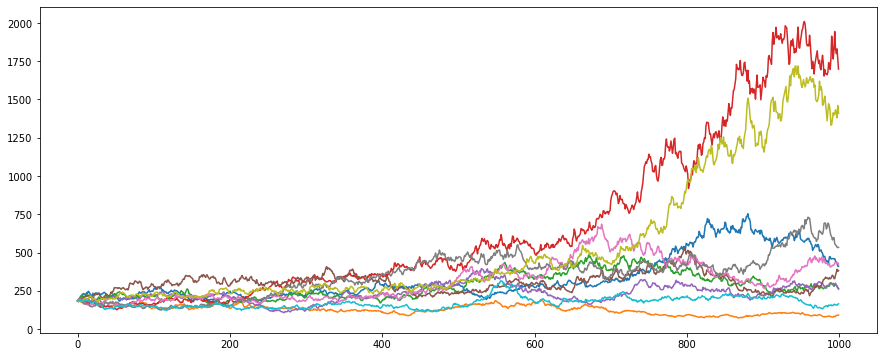

In [23]:
plt.figure(figsize=(15,6))
plt.plot(price_list);

In [24]:
df = pd.DataFrame(price_list)

In [25]:
df.head()

,0,1,2,3,4,5,6,7,8,9
0,183.539993,183.539993,183.539993,183.539993,183.539993,183.539993,183.539993,183.539993,183.539993,183.539993
1,188.639146,178.687512,192.848403,191.342751,189.466336,184.749661,185.678049,178.587161,186.485112,186.824595
2,195.059510,180.821540,197.204729,188.263629,198.904157,194.823822,190.975932,184.287075,180.839171,191.489478
3,204.383851,184.326163,203.052532,198.411030,195.751831,190.061783,197.405131,186.859239,181.024014,184.317673
4,210.444237,184.698554,216.168972,191.603599,191.936270,192.369758,187.830022,186.472876,176.472906,186.732931


In [26]:
import seaborn as sns

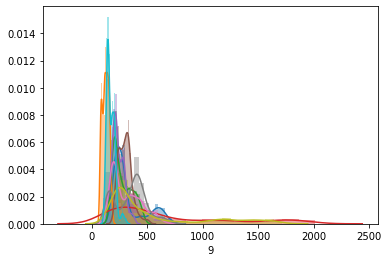

In [27]:
for i in range(len(df.columns)):
    sns.distplot(df[i])